# Case 1

In [3]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import pandas as pd

# filename = "sound.wav"
# data,sample_rate = librosa.load(filename)
# ipd.Audio(filename)

# Data Check

In [4]:
def mse(func):
    error=np.abs(data-func())
    return np.mean(error)*1500

def func(cf) :
    time = np.linspace(0, 0.5, len(data))
    sound = np.sum(cf[0]*np.sin(np.array( [i*time for i in cf[1:]] )), axis=0)
    
    return sound

def test_1():
    return func(init_cf)

def test_2():
    return func(gen_list)  

In [5]:
def generate_list():
    gen_list = [max(data)/4, 0,0,0,0]
    for i in range (1, len(gen_list)):
        gen_list[i] = random.randint(1, 10000)
    
    return gen_list

In [6]:
init_cf = [max(data)/4, 800, 1000, 1200, 1400]
minimum_cf = [max(data)/4, 800, 1000, 1200, 1400]
minimum_loss = 10000

while minimum_loss > 5:

    for _ in range(10000):
        init_cf[4] = init_cf[4] + 1
        if minimum_loss > mse(test_1):
            print("change")
            print("before : ", minimum_loss)
            print("after : ", mse(test_1))
            print("{} -> {}".format(minimum_cf[1:], init_cf[1:]))
            print("")
            minimum_loss = mse(test_1)
            minimum_cf = init_cf

        for _ in range (10000):
            init_cf[3] = init_cf[3] + 1
            if minimum_loss > mse(test_1):
                print("change")
                print("before : ", minimum_loss)
                print("after : ", mse(test_1))
                print("{} -> {}".format(minimum_cf[1:], init_cf[1:]))
                print("")                        
                minimum_loss = mse(test_1)
                minimum_cf = init_cf
            
            for _ in range (10000):
                    init_cf[2] = init_cf[2] + 1
                    if minimum_loss > mse(test_1):
                        print("change")
                        print("before : ", minimum_loss)
                        print("after : ", mse(test_1))
                        print("{} -> {}".format(minimum_cf[1:], init_cf[1:]))
                        print("")                        
                        minimum_loss = mse(test_1)
                        minimum_cf = init_cf
                    
                    for _ in range (10000):
                        init_cf[1] = init_cf[1] + 1
                        if minimum_loss > mse(test_1):
                            print("change")
                            print("before : ", minimum_loss)
                            print("after : ", mse(test_1))
                            print("{} -> {}".format(minimum_cf[1:], init_cf[1:]))
                            print("")                        
                            minimum_loss = mse(test_1)
                            minimum_cf = init_cf


NameError: name 'data' is not defined

In [7]:
import random 

check_list = list()
minimum_loss_cf = [0,0,0,0,0]
minimum_loss = 10000

while minimum_loss > 5:
    gen_list = generate_list()

    while gen_list in check_list:
        gen_list = generate_list()
        print('regenerate')
    
    check_list.append(gen_list)
    
    if minimum_loss > mse(test_2):
        print("Old Frequency: ", minimum_loss_cf[1:])
        print("Old Loss: ", minimum_loss)
        minimum_loss = mse(test_2)
        minimum_loss_cf = gen_list 
        print("Update Frequency: ", minimum_loss_cf[1:])
        print("Update Loss: ",minimum_loss) 
        print("")

NameError: name 'data' is not defined

# Case 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# data load

import pandas as pd

pd_data=pd.read_excel("Concrete_Data.xls")

print(pd_data.shape)
pd_data.describe()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
pd_data.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [10]:
pd_data = pd_data.rename({pd_data.columns[0]:'Cement',
                          pd_data.columns[1]:'BFS',
                          pd_data.columns[2]:'Fly_Ash',
                          pd_data.columns[3]:'Water',
                          pd_data.columns[4]: 'Superplasticizer',
                          pd_data.columns[5]: 'Coarse_Aggregate',
                          pd_data.columns[6]: 'Fine Aggregate',
                          pd_data.columns[7]: 'Age',
                          pd_data.columns[8]: 'y'
                          },axis = 1)

In [11]:
pd_data.isnull().sum()

Cement              0
BFS                 0
Fly_Ash             0
Water               0
Superplasticizer    0
Coarse_Aggregate    0
Fine Aggregate      0
Age                 0
y                   0
dtype: int64

<Axes: >

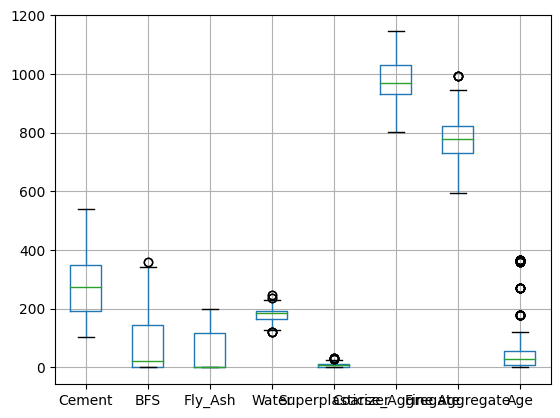

In [12]:
%matplotlib inline
pd_data.boxplot(column = ["Cement","BFS","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine Aggregate","Age"])

In [13]:
# normalization

# normalization_data = (pd_data - pd_data.min())/(pd_data.max()-pd_data.min())
normalization_data = (pd_data - pd_data.mean())/pd_data.std()
normalization_data.describe()

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,y
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,6.898473e-17,-9.657862e-17,-1.103756e-16,3.035328e-16,-5.518779e-17,2.207511e-16,-2.000557e-16,4.139084e-17,2.759389e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714386e+00,-8.564702e-01,-8.467207e-01,-2.800973e+00,-1.038440e+00,-2.211063e+00,-2.239824e+00,-7.070160e-01,-2.004470e+00
25%,-8.496130e-01,-8.564702e-01,-8.467207e-01,-7.804222e-01,-1.038440e+00,-5.262583e-01,-5.316951e-01,-6.120340e-01,-7.249463e-01
50%,-7.909154e-02,-6.014838e-01,-8.467207e-01,1.607843e-01,2.459003e-02,-6.325853e-02,7.397674e-02,-2.795973e-01,-8.231107e-02
75%,6.586571e-01,8.003620e-01,1.001350e+00,4.885677e-01,6.624079e-01,7.264133e-01,6.288849e-01,1.636517e-01,6.176613e-01
max,2.476715e+00,3.309081e+00,2.280014e+00,3.064009e+00,4.352042e+00,2.213157e+00,2.731774e+00,5.055221e+00,2.800328e+00


In [14]:
normalization_data

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,y
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597,2.643908
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597,1.560519
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340,0.266478
3,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221,0.313363
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594,4.976069,0.507506
...,...,...,...,...,...,...,...,...,...
1025,-0.045601,0.488004,0.564295,-0.092077,0.451476,-1.322361,-0.065842,-0.279597,0.506805
1026,0.392647,-0.856470,0.959629,0.675873,0.702585,-1.993710,0.496675,-0.279597,-0.277692
1027,-1.269441,0.759216,0.850248,0.521346,-0.017262,-1.035558,0.080088,-0.279597,-0.725576
1028,-1.168012,1.307437,-0.846721,-0.279382,0.853251,0.214541,0.191095,-0.279597,-0.182561


In [15]:
np_data = normalization_data.to_numpy()
X,y= np_data[:,:8], np_data[:,8:]

pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340
3,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594,4.976069
...,...,...,...,...,...,...,...,...
1025,-0.045601,0.488004,0.564295,-0.092077,0.451476,-1.322361,-0.065842,-0.279597
1026,0.392647,-0.856470,0.959629,0.675873,0.702585,-1.993710,0.496675,-0.279597
1027,-1.269441,0.759216,0.850248,0.521346,-0.017262,-1.035558,0.080088,-0.279597
1028,-1.168012,1.307437,-0.846721,-0.279382,0.853251,0.214541,0.191095,-0.279597


In [16]:
X = np.append(X, np.ones((len(X), 1)), axis=1) # bias
X.shape

(1030, 9)

In [17]:
X_train = X[:800,:] 
X_test = X[800:,:]
y_train = y[:800,:] 
y_test = y[800:,:]

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    
    def __init__(self, alpha=0.0001, num_iterations=10000):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.theta = None
        self.mean = None
        self.std = None
        
    def compute_cost(self, X, y, theta):
        m = len(y)
        h = X.dot(theta)
        J = (1/(2*m)) * np.sum((h-y)**2)
        return J            
    
    def fit(self, X, y):
        # Initialize the parameter vector (theta)
        
        m = len(y)
        J_history = np.zeros(self.num_iterations)
        self.theta = np.zeros([X.shape[1],1])

        # Run gradient descent
        for i in range(self.num_iterations):
            h = X.dot(self.theta)
            print(X.shape)
            print(self.theta.shape)
            self.theta = self.theta - (self.alpha/X.shape[0]) * X.T.dot(h-y)
            J_history[i] = self.compute_cost( X,y, self.theta)
            
        return J_history, self.theta
            
        

    def predict(self, X):
        # Make predictions using the learned parameter vector
        y_pred = X.dot(self.theta)
        return y_pred

    def plot_cost_history(self, X, y):
        J_history, _ = self.fit(X,y)

        # Plot the cost function vs. iterations to check for convergence
        plt.plot(J_history)
        plt.text(7000,0.45, 'Iterations: {} \nLearning Rate : {}'.format(self.num_iterations, self.alpha))
        plt.xlabel('Iterations')
        plt.ylabel('Cost Function')
        plt.title('Gradient Descent Convergence')
        plt.show()
        
    
        

(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)
(9, 1)
(800, 9)

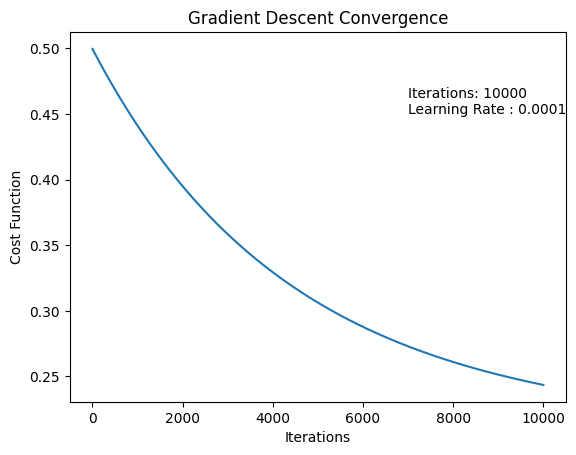

In [19]:
c = LinearRegression()

w,p = c.fit(X_train, y_train)
z = c.compute_cost(X_test, y_test, p)
c.plot_cost_history(X, y)

In [13]:
def mse(w, X, y) :
    preds = X.dot(w)
    preds = preds.reshape(len(preds), -1) # 바뀐 부분
    loss = 0.5*np.sum((preds-y)**2)/len(X)
    return loss

In [14]:
mse(p, X_test, y_test)

0.1933489068634911

In [15]:
X = pd.DataFrame(normalization_data).iloc[:,0:10]

In [16]:
corr_matrix = np.corrcoef(X, rowvar=False)

In [17]:
corr_matrix

array([[ 1.        , -0.27519344, -0.39747544, -0.08154361,  0.09277137,
        -0.10935604, -0.22272017,  0.08194726,  0.49783272],
       [-0.27519344,  1.        , -0.32356947,  0.10728594,  0.04337574,
        -0.28399823, -0.28159326, -0.0442458 ,  0.13482445],
       [-0.39747544, -0.32356947,  1.        , -0.257044  ,  0.37733956,
        -0.00997679,  0.07907635, -0.15437016, -0.10575335],
       [-0.08154361,  0.10728594, -0.257044  ,  1.        , -0.65746444,
        -0.18231167, -0.45063498,  0.27760443, -0.28961348],
       [ 0.09277137,  0.04337574,  0.37733956, -0.65746444,  1.        ,
        -0.26630276,  0.22250149, -0.19271652,  0.3661023 ],
       [-0.10935604, -0.28399823, -0.00997679, -0.18231167, -0.26630276,
         1.        , -0.17850575, -0.00301551, -0.16492782],
       [-0.22272017, -0.28159326,  0.07907635, -0.45063498,  0.22250149,
        -0.17850575,  1.        , -0.15609405, -0.16724896],
       [ 0.08194726, -0.0442458 , -0.15437016,  0.27760443, -0

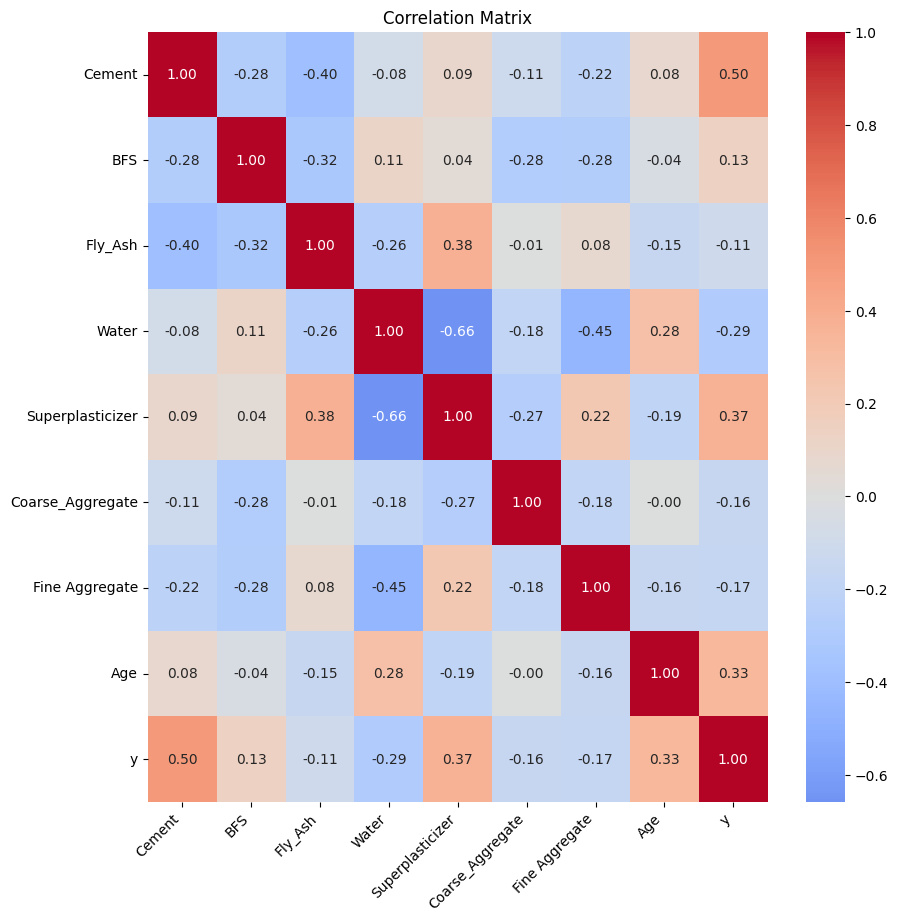

In [18]:
import seaborn as sns



fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax)

# Add labels and title
ax.set_xticklabels(labels=X.columns, rotation=45, ha='right')
ax.set_yticklabels(labels=X.columns, rotation=0)
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

In [19]:
def mse(w, X, y) :
    preds = X.dot(w)
    preds = preds.reshape(len(preds), -1) # 바뀐 부분
    loss = 0.5*np.sum((preds-y)**2)/len(X)
    return loss


theta = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))


mse(theta, X_test, y_test)

0.132455635123483

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# assume X and y are defined
coeffs = np.linalg.inv(X.T @ X) @ X.T @ y
feature_importance = coeffs[1:]


In [35]:
feature_importance

,0
1,1.286039e-16
2,-8.074532e-16
3,-8.128750e-16
4,2.099047e-16
5,-1.873032e-16
6,-4.476914e-16
7,-1.474721e-16
8,1.000000e+00
